In [99]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
df = pd.read_csv("higgs_data_cleansed.csv", header=None)

In [101]:
X = df.iloc[:,1:]
Xl = df.iloc[:,1:22]
Xh = df.iloc[:,22:]
Y = df.iloc[:,0]

In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=42)
Xl_train, Xl_test, Yl_train, Yl_test = train_test_split(Xl,Y,test_size=0.25, random_state=42)
Xh_train, Xh_test, Yh_train, Yh_test = train_test_split(Xh,Y,test_size=0.25, random_state=42)

In [103]:
sc = StandardScaler()
scl = StandardScaler()
sch = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
Xl_train = scl.fit_transform(Xl_train)
Xl_test = scl.transform(Xl_test)
Xh_train = sch.fit_transform(Xh_train)
Xh_test = sch.transform(Xh_test)

#Using Every Column

In [104]:
ann = Sequential()
ann.add(Input(shape=(28,)))
ann.add(Dense(32, activation='tanh'))
ann.add(Dense(16, activation='tanh'))
ann.add(Dense(8, activation='tanh'))
ann.add(Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [105]:
model = ann.fit(X_train,Y_train,batch_size=16, epochs=30, validation_data=(X_test,Y_test) )
ann.summary()

Epoch 1/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5133 - loss: 0.7196 - val_accuracy: 0.5237 - val_loss: 0.7005
Epoch 2/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5623 - loss: 0.6840 - val_accuracy: 0.5397 - val_loss: 0.6894
Epoch 3/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5895 - loss: 0.6685 - val_accuracy: 0.5592 - val_loss: 0.6829
Epoch 4/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6060 - loss: 0.6620 - val_accuracy: 0.5667 - val_loss: 0.6784
Epoch 5/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6131 - loss: 0.6540 - val_accuracy: 0.5767 - val_loss: 0.6751
Epoch 6/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6157 - loss: 0.6528 - val_accuracy: 0.5782 - val_loss: 0.6722
Epoch 7/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6362 - loss: 0.6438 - val_accuracy: 0.5807 - val_loss: 0.6699
Epoch 8/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6219 - loss: 0.6472 - val_accuracy: 0.

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_175 (Dense)               │ (None, 32)             │           928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_176 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_177 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_178 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,805 (18.77 KB)

 Trainable params: 1,601 (6.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,204 (12.52 KB)

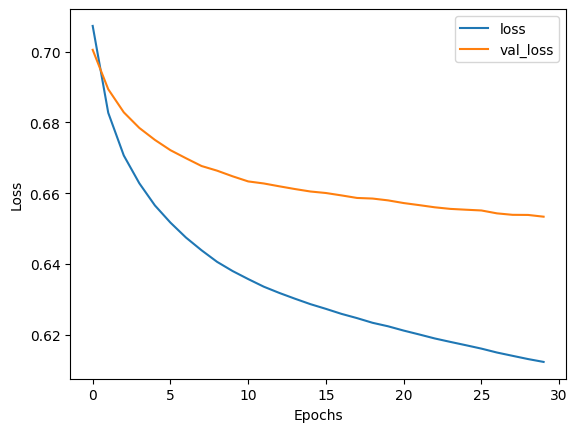

In [107]:
plt.plot(pd.DataFrame(model.history)['loss'], label='loss')
plt.plot(pd.DataFrame(model.history)['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [110]:
Y_pred = ann.predict(X_test);
Y_pred_TF = (Y_pred>0.5)
cm = confusion_matrix(Y_test,Y_pred_TF)
print('The Confusion Matrix is the following:')
print(cm)
loss, accuracy = ann.evaluate(X_test, Y_test);
print(f'The validation accuracy score is: {accuracy}')
print(f'The validation loss is: {loss}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
The Confusion Matrix is the following:
[[528 477]
 [278 718]]
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6344 - loss: 0.6445
The validation accuracy score is: 0.6226886510848999
The validation loss is: 0.653387188911438


In [120]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

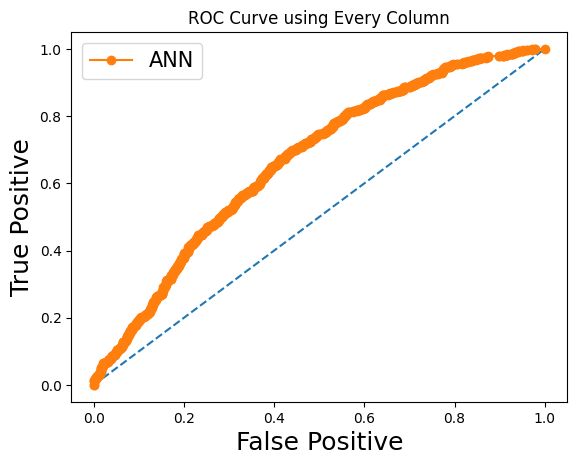

In [121]:
plt.plot([0,1], [0,1], '--')
plt.plot(fpr,tpr, 'o-', label='ANN')
plt.title('ROC Curve using Every Column')
plt.xlabel('False Positive', fontsize=18)
plt.ylabel('True Positive', fontsize=18)
plt.legend(fontsize=15)
#plt.savefig('roc_curve.png')
plt.show()

In [126]:
print(f'The AUC Score of the ROC Curve is: {roc_auc_score(Y_test,Y_pred)}')

The AUC Score of the ROC Curve is: 0.6658824352134907


#Low Level

In [122]:
annl = Sequential()
annl.add(Input(shape=(21,)))
annl.add(Dense(32, activation='tanh'))
annl.add(Dense(4, activation='tanh'))
annl.add(Dense(units=1, activation='sigmoid'))
annl.compile(optimizer = Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [123]:
modell = annl.fit(Xl_train,Yl_train,batch_size=32, epochs=40, validation_data=(Xl_test,Yl_test) )
annl.summary()

Epoch 1/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5124 - loss: 0.7097 - val_accuracy: 0.5052 - val_loss: 0.7042
Epoch 2/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5220 - loss: 0.7002 - val_accuracy: 0.5057 - val_loss: 0.7006
Epoch 3/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5099 - loss: 0.7005 - val_accuracy: 0.5172 - val_loss: 0.6977
Epoch 4/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5325 - loss: 0.6937 - val_accuracy: 0.5222 - val_loss: 0.6956
Epoch 5/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5302 - loss: 0.6922 - val_accuracy: 0.5252 - val_loss: 0.6938
Epoch 6/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5500 - loss: 0.6877 - val_accuracy: 0.5317 - val_loss: 0.6926
Epoch 7/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5668 - loss: 0.6857 - val_accuracy: 0.5372 - val_loss: 0.6917
Epoch 8/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5526 - loss: 0.6877 - val_accuracy: 0.

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_179 (Dense)               │ (None, 32)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_180 (Dense)               │ (None, 4)              │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_181 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,525 (9.87 KB)

 Trainable params: 841 (3.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,684 (6.58 KB)

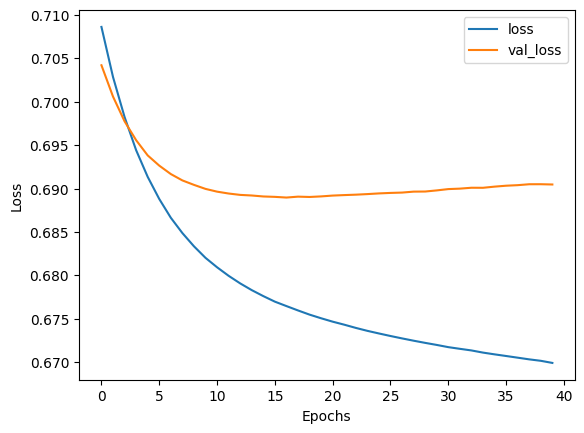

In [124]:
plt.plot(pd.DataFrame(modell.history)['loss'], label='loss')
plt.plot(pd.DataFrame(modell.history)['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [125]:
Yl_pred = annl.predict(Xl_test)
Yl_pred_TF = (Yl_pred>0.5)
cml = confusion_matrix(Yl_test,Yl_pred_TF)
print('The Confusion Matrix is the following:')
print(cml)
lossl, accuracyl = annl.evaluate(Xl_test, Yl_test);
print(f'Low Level | The validation accuracy score is: {accuracyl}')
print(f'Low Level | The validation loss is: {lossl}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
The Confusion Matrix is the following:
[[392 613]
 [326 670]]
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5426 - loss: 0.6857
Low Level | The validation accuracy score is: 0.530734658241272
Low Level | The validation loss is: 0.6904639601707458


In [127]:
fprl, tprl, thresholdsl = roc_curve(Yl_test, Yl_pred)

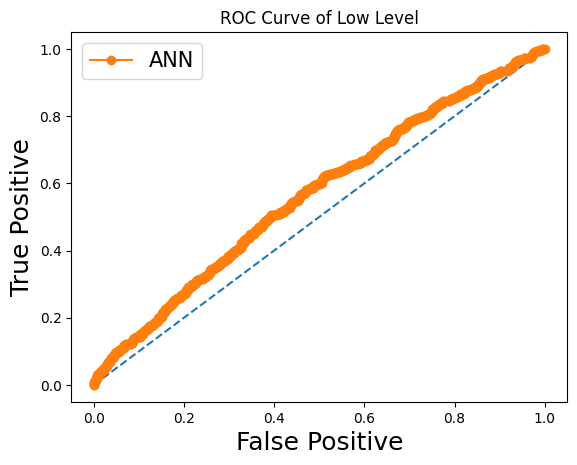

In [128]:
plt.plot([0,1], [0,1], '--')
plt.plot(fprl,tprl, 'o-', label='ANN')
plt.title('ROC Curve of Low Level')
plt.xlabel('False Positive', fontsize=18)
plt.ylabel('True Positive', fontsize=18)
plt.legend(fontsize=15)
#plt.savefig('roc_curve_low.png')
plt.show()

In [129]:
print(f'The AUC Score of the ROC Curve is: {roc_auc_score(Yl_test,Yl_pred)}')

The AUC Score of the ROC Curve is: 0.5661511718515854


#High Level

In [85]:
annh = Sequential()
annh.add(Input(shape=(7,)))
annh.add(Dense(128,activation='tanh'))
annh.add(Dense(64, activation='tanh'))
annh.add(Dense(32, activation='tanh'))
annh.add(Dense(16, activation='tanh'))
annh.add(Dense(8, activation='tanh'))
annh.add(Dense(units=1, activation='sigmoid'))
annh.compile(optimizer = Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [86]:
modelh = annh.fit(Xh_train,Yh_train,batch_size=64, epochs=180, validation_data=(Xh_test,Yh_test) )
annh.summary()

Epoch 1/180
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5927 - loss: 0.6777 - val_accuracy: 0.5967 - val_loss: 0.6711
Epoch 2/180
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6068 - loss: 0.6663 - val_accuracy: 0.6027 - val_loss: 0.6630
Epoch 3/180
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6358 - loss: 0.6505 - val_accuracy: 0.6162 - val_loss: 0.6558
Epoch 4/180
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6295 - loss: 0.6470 - val_accuracy: 0.6182 - val_loss: 0.6512
Epoch 5/180
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6328 - loss: 0.6475 - val_accuracy: 0.6217 - val_loss: 0.6471
Epoch 6/180
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6436 - loss: 0.6344 - val_accuracy: 0.6282 - val_loss: 0.6427
Epoch 7/180
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6389 - loss: 0.6321 - val_accuracy: 0.6362 - val_loss: 0.6403
Epoch 8/180
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6454 - loss: 0.6295 - val_accuracy: 0.6377 - v

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_169 (Dense)               │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_170 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_171 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_172 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_173 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_174 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,101 (141.02 KB)

 Trainable params: 12,033 (47.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,068 (94.02 KB)

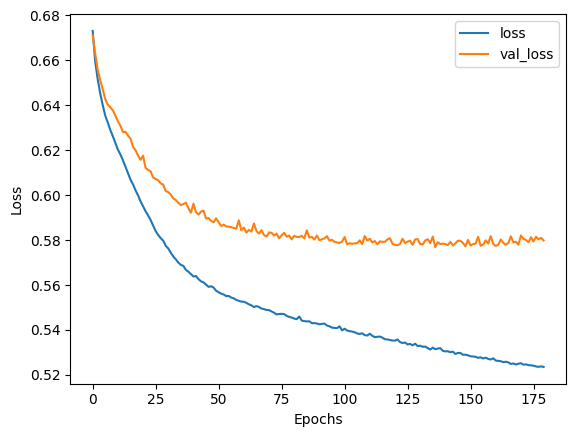

In [87]:
plt.plot(pd.DataFrame(modelh.history)['loss'], label='loss')
plt.plot(pd.DataFrame(modelh.history)['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [131]:
Yh_pred = annh.predict(Xh_test)
Yh_pred_TF = (Yh_pred>0.5)
cmh = confusion_matrix(Yh_test,Yh_pred_TF)
print('The Confusion Matrix is the following:')
print(cmh)
lossh, accuracyh = annh.evaluate(Xh_test, Yh_test);
print(f'High Level | The validation accuracy score is: {accuracyh}')
print(f'High Level | The validation loss is: {lossh}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
The Confusion Matrix is the following:
[[688 317]
 [290 706]]
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6859 - loss: 0.5853
High Level | The validation accuracy score is: 0.6966516971588135
High Level | The validation loss is: 0.5798376798629761


In [133]:
fprh, tprh, thresholds = roc_curve(Yh_test, Yh_pred)

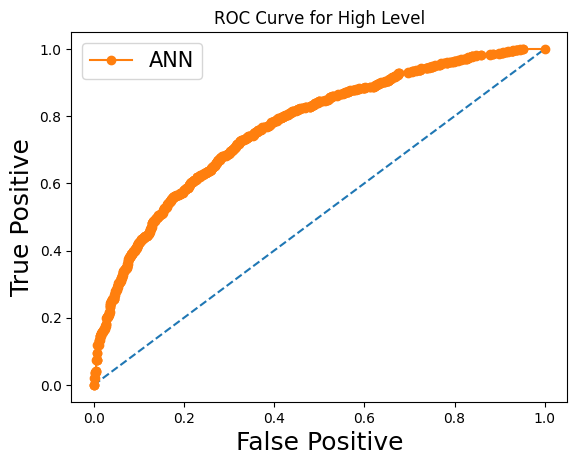

In [134]:
plt.plot([0,1], [0,1], '--')
plt.plot(fprh,tprh, 'o-', label='ANN')
plt.title('ROC Curve for High Level')
plt.xlabel('False Positive', fontsize=18)
plt.ylabel('True Positive', fontsize=18)
plt.legend(fontsize=15)
#plt.savefig('roc_curve_high.png')
plt.show()

In [135]:
print(f'The AUC Score of the ROC Curve is: {roc_auc_score(Yh_test,Yh_pred)}')

The AUC Score of the ROC Curve is: 0.766523806669464
